In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_label0 = np.random.normal(5, 1, 10)
x_label1 = np.random.normal(2, 1, 10)
xs = np.append(x_label0, x_label1)
labels = [0.] * len(x_label0) + [1.] * len(x_label1)

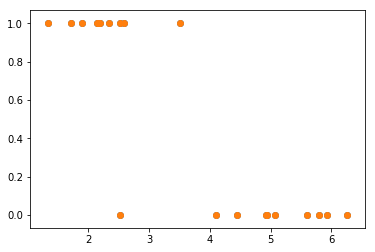

In [4]:
plt.scatter(xs, labels)
plt.show()

In [5]:
learning_rate = 0.001
training_epochs = 1000

In [6]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

In [39]:
def model(X, w):
    x = tf.multiply(w[1], tf.pow(X, 1))
    y = tf.multiply(w[0], tf.pow(X, 0))
    return tf.add(x, y)

In [40]:
w = tf.Variable([0.,0.], name="parameters")
y_model = model(X, w)
cost = tf.reduce_sum(tf.square(Y - y_model))

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [41]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [42]:
for epoch in range(training_epochs):
    sess.run(train_op, feed_dict={X: xs, Y: labels})
    current_cost = sess.run(cost, feed_dict={X: xs, Y: labels})
    if epoch in range(training_epochs):
        print(epoch, current_cost)

0 8.35044
1 8.07831
2 7.97288
3 7.88842
4 7.80736
5 7.72759
6 7.64885
7 7.57107
8 7.49426
9 7.4184
10 7.34347
11 7.26947
12 7.19639
13 7.1242
14 7.05291
15 6.9825
16 6.91296
17 6.84427
18 6.77644
19 6.70944
20 6.64327
21 6.57792
22 6.51337
23 6.44962
24 6.38666
25 6.32448
26 6.26306
27 6.2024
28 6.1425
29 6.08333
30 6.02489
31 5.96717
32 5.91017
33 5.85387
34 5.79827
35 5.74335
36 5.68911
37 5.63554
38 5.58264
39 5.53038
40 5.47877
41 5.4278
42 5.37746
43 5.32774
44 5.27863
45 5.23013
46 5.18223
47 5.13492
48 5.0882
49 5.04205
50 4.99647
51 4.95146
52 4.907
53 4.86309
54 4.81972
55 4.77689
56 4.73459
57 4.69281
58 4.65154
59 4.61079
60 4.57054
61 4.53078
62 4.49152
63 4.45274
64 4.41444
65 4.37661
66 4.33925
67 4.30235
68 4.26591
69 4.22992
70 4.19437
71 4.15926
72 4.12459
73 4.09034
74 4.05652
75 4.02311
76 3.99012
77 3.95753
78 3.92535
79 3.89356
80 3.86217
81 3.83116
82 3.80054
83 3.77029
84 3.74042
85 3.71092
86 3.68178
87 3.653
88 3.62458
89 3.59651
90 3.56878
91 3.5414
92 3.51435

In [43]:
w_val = sess.run(w)
print('learned parameters', w_val)

learned parameters [ 1.46385467 -0.26793233]


In [19]:
sess.close()

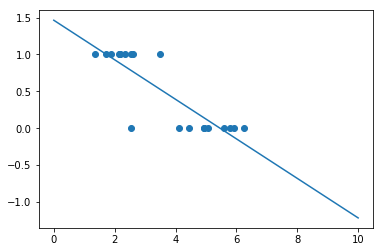

In [20]:
all_xs = np.linspace(0, 10, 100)
plt.plot(all_xs, all_xs * w_val[1] + w_val[0])
plt.scatter(xs, labels)
plt.show()

In [45]:
correct_prediction = tf.equal(
    Y, 
    tf.to_float(tf.greater(y_model, 0.5))
)
accuracy = tf.reduce_mean(tf.to_float(correct_prediction))

print('accuracy', sess.run(accuracy, feed_dict={X: xs, Y: labels}))

accuracy 0.95
